In [59]:
from comut import comut
from comut import fileparsers
import palettable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [405]:
pathmeg3  = "/home/alva/Documents/lncRNAs_project_2020/MEG3/"
brca      = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/"
brca_meta = "/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/filtered_results/"
path      = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/filtered_results/'
cancer_lncRNAs_census = '/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/autoencoder_lncRNAs/data/'
brca_meth ='/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/DNA_methy_tcga/meth/de/'

In [326]:
def readfile(path,filename):
    df = pd.read_csv(path+filename,header=0,sep='\t',skipinitialspace=True)
    return df
def rename_cols(df,oldname,newname):
    df.rename(columns={oldname:newname},inplace=True)
    return df
def annon(df1,string,df2):
    df_annon = pd.merge(df1,df2,on=string)
def rename_rows(g):
    return '\t'.join(g.types + '-' + g._merge) 
def outers_join(df1,df2,string):
    df_new = pd.merge(df1, df2, on=string,how="outer")
    return df_new

In [133]:
refs        ='/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/Tcga_R/GDCdata/TCGA-BRCA/harmonized/Transcriptome_Profiling/Gene_Expression_Quantification/r_data/reference/Homo_sapiens.GRCh38.97.chr.txt'
ref         = pd.read_csv(refs, sep="\t", header=0,skipinitialspace=True)
lncRNAs_ref = ref.query('biotype == "lncRNA"')
PC_ref      = ref.query('biotype == "protein_coding"')

In [154]:
cnv_cor="/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/BRCA/reports_20130923_BRCA-TP/Correlate_CopyNumber_vs_mRNAseq/"

In [ ]:
cnv="/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/BRCA/reports_20130923_BRCA-TP/CopyNumber_Gistic2/"

In [406]:
brca_de       =readfile(brca,"lncRNA_0.58_TCGA-BRCA_DE")
brca_metainfo =readfile(brca_meta,"BRCA_metainformation")
pathways      =readfile(path,"cis_onco_pathways_ann_cols")
clc           =readfile(cancer_lncRNAs_census,"lncRNA_CLC")
brca_meth     =readfile(brca_meth,"methylated_lncRNAs_BRCA")

In [411]:
brca_meth =rename_cols(brca_meth,"Gene","gene_sym")
clc = clc[["NAME AS PUBLISHED","Oncogene (o) or Tumour Supp(t)"]]
clc = rename_cols(clc,"NAME AS PUBLISHED","gene_sym")
clc = rename_cols(clc,"Oncogene (o) or Tumour Supp(t)","types")

In [155]:
cnv_cor =readfile(cnv_cor,"BRCA-TPcors.txt")
cnv_cor =rename_cols(cnv_cor,"Gene Symbol","gene_sym")


In [259]:
#cnv = readfile(cnv_cor,"amp_genes.conf_99.txt")

In [175]:
cnv_cor_ann=pd.merge(cnv_cor,ref,on='gene_sym')
cnv_cor_ann

,Locus ID,gene_sym,Cytoband,cor,p,q,chr,start,end,gene_id,biotype
0,9070,ASH2L,8p11.23,0.9250,0.000000e+00,0.000000e+00,8,38105242,38144076,ENSG00000129691,protein_coding
1,5709,PSMD3,17q21.1,0.9021,0.000000e+00,0.000000e+00,17,39980807,39997959,ENSG00000108344,protein_coding
2,10948,STARD3,17q12,0.8922,0.000000e+00,0.000000e+00,17,39637090,39664201,ENSG00000131748,protein_coding
3,55290,BRF2,8p11.23,0.8910,0.000000e+00,0.000000e+00,8,37843268,37849904,ENSG00000104221,protein_coding
4,92105,INTS4,11q14.1,0.8842,0.000000e+00,0.000000e+00,11,77878720,77994671,ENSG00000149262,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...
16303,7373,COL14A1,8q24.12,-0.2567,4.441702e-16,1.001357e-16,8,120059780,120373573,ENSG00000187955,protein_coding
16304,283471,TMPRSS12,12q13.12,-0.2574,9.138519e-08,1.665418e-08,12,50842920,50887884,ENSG00000186452,protein_coding
16305,362,AQP5,12q13.12,-0.2788,9.285102e-18,2.119944e-18,12,49961872,49965682,ENSG00000161798,protein_coding
16306,2625,GATA3,10p14,-0.3170,4.227023e-24,9.653140e-25,10,8045378,8075198,ENSG00000107485,protein_coding


In [171]:
cnv_exp_cor_lncRNAs=cnv_cor_ann.query('biotype=="lncRNA"')

/home/alva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [569]:
brca_de_path.head()

,gene_sym,Pathway,features
0,AC008115.3,Cell_Cycle,cancer_driver
1,CDKN2B-AS1,Cell_Cycle,cancer_driver
2,CDKN2B-AS1,Cell_Cycle,SNPS
3,CDKN2B-AS1,Cell_Cycle,cancer_driver
4,CDKN2B-AS1,Cell_Cycle,SNPS


 Buliding a logical regression model for the following data for functional prediction

1. DataFrame preparations

In [419]:
SNPS_breast    = pd.read_csv('/home/alva/Documents/lncRNAs_project_2020/Analysis_2021/lncRNAs_TCGA/SNPs_loci_lncRNAs_Breast',sep='\t',header=0,skipinitialspace=True)
SNPS_ann       = pd.merge(lncRNAs_ref[["gene_id","gene_sym"]],SNPS_breast[["gene_id","p-Value"]],on="gene_id")
SNPS_ann       = rename_cols(SNPS_ann,"p-Value","risk_alelle_freq")
SNPS_ann_de    = pd.merge(brca_metainfo['gene_sym'],SNPS_ann[["risk_alelle_freq","gene_sym"]],on='gene_sym')
SNPS_ann_de['risk_alelle_freq'] = pd.to_numeric(SNPS_ann_de['risk_alelle_freq'], errors='coerce')
SNPS_ann_de.fillna(0, inplace=True)
SNPS_ann_de    = SNPS_ann_de.sort_values(by='risk_alelle_freq', ascending=False)
SNPS_ann_de.drop_duplicates(subset='gene_sym', keep="first",inplace=True)
chrom_de_ezh2  = brca_ezh2_h2k27.query('chromatin=="EZH2"')
chrom_de_H3K27 = brca_ezh2_h2k27.query('chromatin=="H3K27"')
clc_de         = pd.merge(brca_metainfo['gene_sym'],clc,on='gene_sym')
brca_meth_de   = pd.merge(brca_metainfo['gene_sym'],brca_meth[["gene_sym","Meth_Mean"]],on='gene_sym')

In [506]:
def label_paths (row):
    if row['Pathway'] == "unknown":
        return 0
    else:
        return 1

In [509]:
brca_new = pd.merge(brca_metainfo, SNPS_ann_de, on='gene_sym',how="outer")
brca_new = outers_join(brca_new,chrom_de_ezh2[["gene_sym","logFC_chromatin"]],"gene_sym")
brca_new = outers_join(brca_new,chrom_de_H3K27[["gene_sym","logFC_chromatin"]],"gene_sym")
brca_new = rename_cols(brca_new,"logFC_chromatin_x","EZH2")
brca_new = rename_cols(brca_new,"logFC_chromatin_y","H3K27")
brca_new = outers_join(brca_new,clc_de,"gene_sym")
brca_new = outers_join(brca_new,brca_de_cnv,"gene_sym")#CNV
brca_new = rename_cols(brca_new,"cor","cnv_exp_cor")
brca_new = outers_join(brca_new,brca_meth_de,"gene_sym")#CNV
brca_new = outers_join(brca_new,brca_de_path[["gene_sym","Pathway"]],"gene_sym")#CNV
brca_new.fillna('unknown', inplace=True)
brca_new.drop(['SNPS'],axis=1,inplace=True)
#brca_new["pathway_y"]= np.where(brca_new['Pathway'] =="unknown",0,1)

In [ ]:
brca_new["pathway_y"] = brca_new.apply(lambda row: label_paths(row), axis=1)

In [535]:
num_cols           = ['EZH2', 'H3K27','logFC','Meth_Mean','cnv_exp_cor','risk_alelle_freq','pathway_y']
brca_new[num_cols] = brca_new[num_cols].apply(pd.to_numeric, errors='coerce')


In [549]:
brca_new.columns

Index(['gene_sym', 'cancer_driver', 'drug_target', 'triplex',
       'promoter_methylated', 'risk_alelle_freq', 'EZH2', 'H3K27', 'types',
       'logFC', 'cnv_exp_cor', 'Meth_Mean', 'Pathway', 'pathway_y'],
      dtype='object')

In [544]:
brca_new.groupby('pathway_y').mean()

,risk_alelle_freq,EZH2,H3K27,logFC,cnv_exp_cor,Meth_Mean
pathway_y,,,,,,
0,0.3844,2.533008,2.480543,-0.403893,0.141108,0.526371
1,0.1700,1.523297,2.675827,0.970452,0.234950,0.378901


In [551]:
brca_new.groupby('promoter_methylated').mean()

,risk_alelle_freq,EZH2,H3K27,logFC,cnv_exp_cor,Meth_Mean,pathway_y
promoter_methylated,,,,,,,
No,0.289111,2.479865,2.498296,-0.362614,0.144162,0.542780,0.008421
Yes,NaN,NaN,NaN,0.028557,0.168400,0.436163,0.100000


<AxesSubplot:xlabel='types', ylabel='count'>

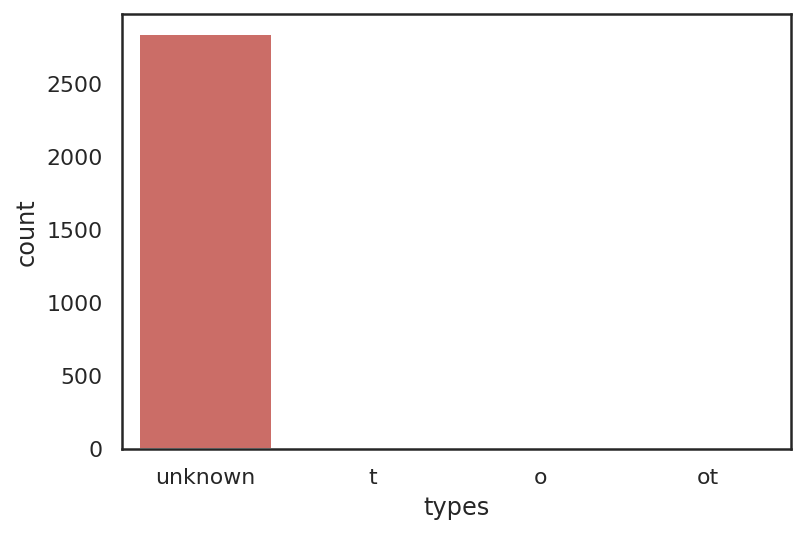

In [477]:
sns.countplot(x='types',data=brca_new,palette='hls')

In [521]:
brca_new.columns

Index(['gene_sym', 'cancer_driver', 'drug_target', 'triplex',
       'promoter_methylated', 'risk_alelle_freq', 'EZH2', 'H3K27', 'types',
       'logFC', 'cnv_exp_cor', 'Meth_Mean', 'Pathway', 'pathway_y'],
      dtype='object')

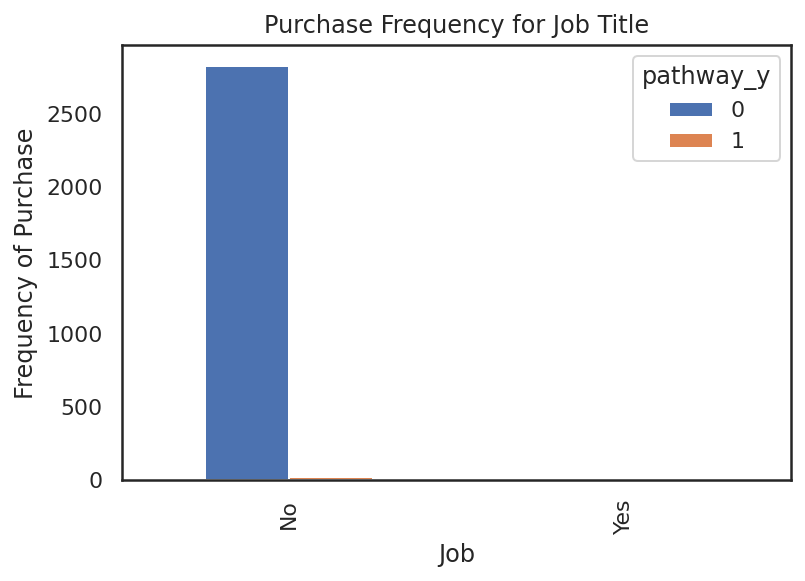

In [563]:
%matplotlib inline
pd.crosstab(brca_new.promoter_methylated,brca_new.pathway_y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

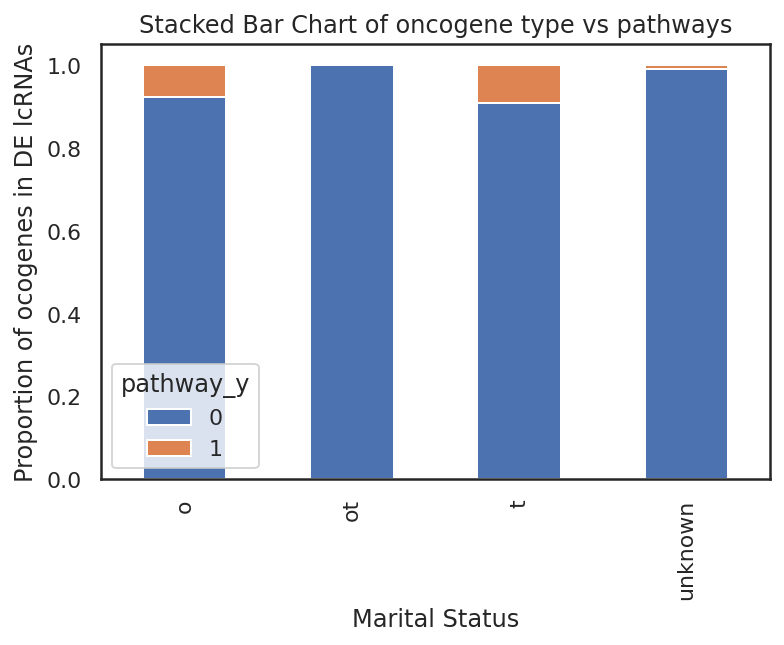

In [565]:
table=pd.crosstab(brca_new.types,brca_new.pathway_y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of oncogene type vs pathways')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of ocogenes in DE lcRNAs')
plt.savefig('oncogene_vs_pathways_stack_BRCA')

In [566]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=brca_.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

NameError: name 'data' is not defined

In [568]:
brca_new.columns.tolist()

['gene_sym',
 'cancer_driver',
 'drug_target',
 'triplex',
 'promoter_methylated',
 'risk_alelle_freq',
 'EZH2',
 'H3K27',
 'types',
 'logFC',
 'cnv_exp_cor',
 'Meth_Mean',
 'Pathway',
 'pathway_y']

In [456]:
count_no_pathway = len(brca_new[brca_new['Pathway']=="unknown"])
count_path1      = len(brca_new[brca_new['Pathway']=="RTK-RAS"])
count_path2      = len(brca_new[brca_new['Pathway']=="Cell_Cycle"])
count_path3      = len(brca_new[brca_new['Pathway']=="PI3K"])
count_path4      = len(brca_new[brca_new['Pathway']=="MYC"])
count_path5      = len(brca_new[brca_new['Pathway']=="WNT"])
count_path6      = len(brca_new[brca_new['Pathway']=="WNT"])
count_path7      = len(brca_new[brca_new['Pathway']=="NRF2"])
count_path8      = len(brca_new[brca_new['Pathway']=="NOTCH"])

In [483]:
types_tum = len(brca_new[brca_new['types']=="t"])
types_o   = len(brca_new[brca_new['types']=="o"])
types_ot  = len(brca_new[brca_new['types']=="ot"])
types_yes = (types_tum+types_o+types_ot)
type_no   = len(brca_new[brca_new['types']=="unknown"])
types_yes

28

In [475]:
def percentage_calc(count_ofyes,countofno,question):
    pct_of_no_sub = count_no_pathway/(count_no_pathway+count_ofyes)
    pct_of_sub    = (count_ofyes)/(count_no_pathway+count_path)
    return(print("percentage of lncRNAs without" + question, pct_of_no_sub*100),print("percentage of lncRNAs with"+question, pct_of_sub*100))


In [464]:
count_path=count_path2+count_path1+count_path3+count_path4+count_path5+count_path6+count_path7+count_path8

24

In [484]:
percentage_calc(count_path,count_no_pathway,"pathway")
percentage_calc(types_yes,type_no,"oncogenes")

percentage of lncRNAs withoutpathway 99.16054564533053
percentage of lncRNAs withpathway 0.8394543546694648
percentage of lncRNAs withoutoncogenes 99.02200488997555
percentage of lncRNAs withoncogenes 0.9793634137810423


(None, None)

In [20]:
EZH2  = readfile(pathmeg3,"EZH2_enriched_lncRNAs")
EZH2  = rename_cols(EZH2,"GeneSymbol","gene_sym")
H3K27 = readfile(pathmeg3,"H3k27_enriched_lncRNAs")
H3K27 = rename_cols(H3K27,"GeneSymbol","gene_sym")

In [66]:
brca_de_EZH2    =pd.merge(brca_de[["gene_sym","logFC"]],EZH2[["gene_sym","logFC"]],on="gene_sym",suffixes=('_de', '_chromatin'))
brca_de_EZH2["chromatin"] = "EZH2"
brca_de_H3K27   =pd.merge(brca_de[["gene_sym","logFC"]],H3K27[["gene_sym","logFC"]],on="gene_sym",suffixes=('_de', '_chromatin'))
brca_de_H3K27["chromatin"] = "H3K27"
brca_ezh2_h2k27 =pd.concat([brca_de_H3K27,brca_de_EZH2])

In [87]:
chrom_de       =pd.melt(brca_ezh2_h2k27,id_vars=['gene_sym','chromatin'])
chrom_de.sort_values(by=['value'],inplace=True)

In [177]:
chrom_de_cd=pd.merge(cnv_exp_cor_lncRNAs[["gene_sym","cor"]],chrom_de,on='gene_sym')
chrom_de_cd

,gene_sym,cor,chromatin,variable,value
0,FAM66C,0.2282,EZH2,logFC_de,-0.783180
1,FAM66C,0.2282,EZH2,logFC_chromatin,1.511485
2,C9orf106,0.1558,H3K27,logFC_de,1.096440
3,C9orf106,0.1558,H3K27,logFC_chromatin,2.070890
4,DNMBP-AS1,0.1410,EZH2,logFC_de,-0.916429
5,DNMBP-AS1,0.1410,EZH2,logFC_chromatin,2.385616
6,FAM13A-AS1,0.1334,EZH2,logFC_de,-1.163607
7,FAM13A-AS1,0.1334,EZH2,logFC_chromatin,1.104310
8,CYP1B1-AS1,0.1049,H3K27,logFC_de,-1.459421
9,CYP1B1-AS1,0.1049,H3K27,logFC_chromatin,1.201587


In [189]:
cnv_exp_cor_lncRNAs.head()

,Locus ID,gene_sym,Cytoband,cor,p,q,chr,start,end,gene_id,biotype
1478,5820,PVT1,8q24.21,0.5951,0.0,0.0,8,127794526,128187101,ENSG00000249859,lncRNA
1974,84791,LINC00467,1q32.3,0.5647,0.0,0.0,1,211382736,211435570,ENSG00000153363,lncRNA
2169,414777,HCG18,6p22.1,0.5544,0.0,0.0,6,30286690,30327382,ENSG00000231074,lncRNA
2319,55000,TUG1,22q12.2,0.5453,0.0,0.0,22,30969245,30979395,ENSG00000253352,lncRNA
2879,641638,SNHG6,8q13.1,0.5143,0.0,0.0,8,66921684,66926398,ENSG00000245910,lncRNA


In [272]:
brca_de_cnv      = pd.merge(brca_de[["gene_sym","logFC"]],cnv_exp_cor_lncRNAs[["gene_sym","cor"]],on="gene_sym")
brca_de_cnv.sort_values(by=['cor'],ascending=False,inplace=True)
brca_de_cnv_melt = pd.melt(brca_de_cnv,id_vars=['gene_sym'])
down_cnv_cor     = brca_de_cnv.query('logFC<=0.58')
down_cnv_cor     = pd.melt(down_cnv_cor,id_vars=['gene_sym'])
triplex_cnv_de   = pd.merge(cancer_driver["gene_sym"],cnv_exp_cor_lncRNAs[["gene_sym","cor"]],on='gene_sym')
chromatin_cnv_de = pd.merge(brca_ezh2_h2k27['gene_sym'],cnv_exp_cor_lncRNAs[["gene_sym","cor"]],on='gene_sym')
triplex_cnv_de

,gene_sym,cor
0,HOTAIR,0.0478
1,PVT1,0.5951
2,MIR22HG,0.3106
3,MIRLET7BHG,0.0285
4,MEG3,0.0831
5,LINC00479,0.0792
6,MIR100HG,0.1598
7,DIO3OS,0.0703


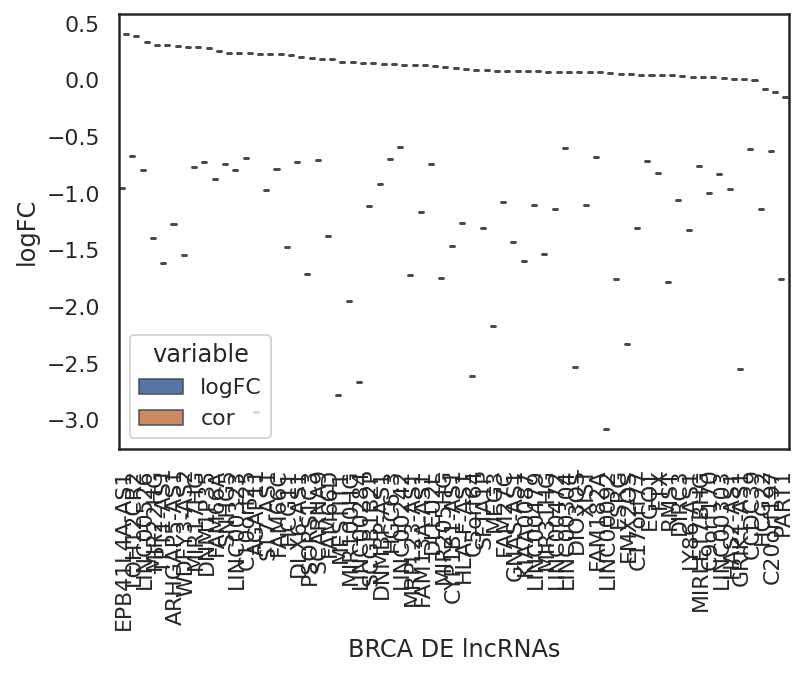

In [231]:
ax=sns.boxplot(x="gene_sym",y="value",hue='variable',data=down_cnv_cor, palette=["C0", "C1"])
ax.set(xlabel='BRCA DE lncRNAs', ylabel='logFC')
sns.set_context(rc={"figure.figsize": (12, 14)})
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [236]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


(-4.0, 0.6)

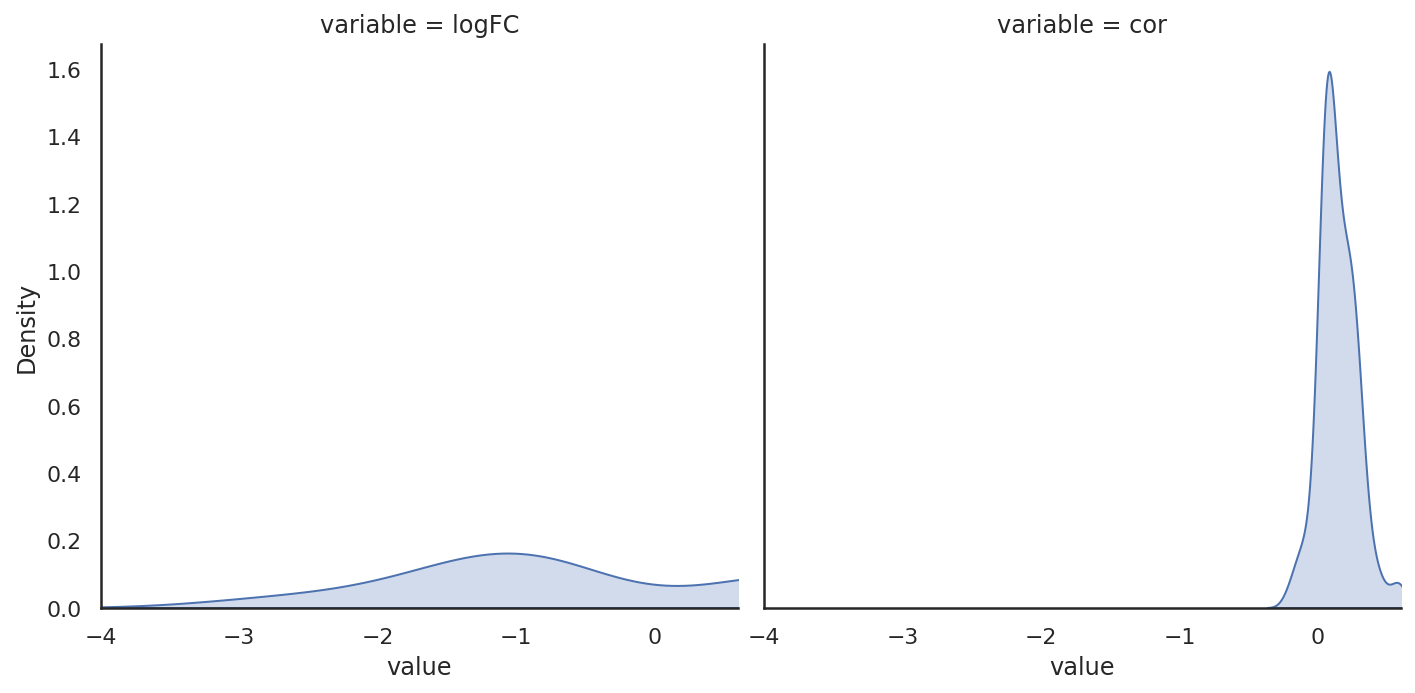

In [256]:
sns.displot(brca_de_cnv_melt, x="value", col="variable",kind="kde",fill=True)
plt.xlim(-4, 0.6)
#plt.ylim(0, 1.75)

In [196]:
sns.set(font_scale=1,font='bold')
#sns.s
sns.set_style("white")
sns.set_context(rc={"figure.figsize": (10, 9)})
#clrs = ['blue' if (x == A*) else 'red' for x in table_Sample.Sample ]

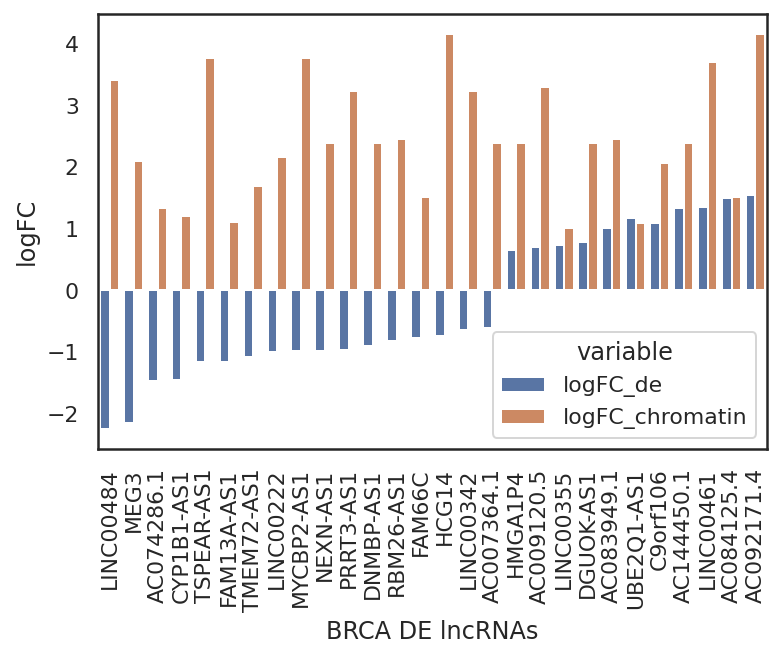

In [197]:
ax=sns.barplot(x="gene_sym",y="value",hue='variable',data=chrom_de,ci=None, palette=["C0", "C1"])
ax.set(xlabel='BRCA DE lncRNAs', ylabel='logFC')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [434]:
brca_metainfo_melt =pd.melt(brca_metainfo,id_vars=['gene_sym'],var_name='features',value_name='value')
brca_metainfo_melt =brca_metainfo_melt.query('value =="Yes"')
brca_metainfo_melt['features'].drop_duplicates()

14             cancer_driver
5758                 triplex
8692     promoter_methylated
11479                   SNPS
Name: features, dtype: object

In [436]:
brca_de_path = pd.merge(pathways[["gene_sym","Pathway"]],brca_metainfo_melt[["gene_sym","features"]],on='gene_sym')
brca_de_path

,gene_sym,Pathway,features
0,AC008115.3,Cell_Cycle,cancer_driver
1,CDKN2B-AS1,Cell_Cycle,cancer_driver
2,CDKN2B-AS1,Cell_Cycle,SNPS
3,CDKN2B-AS1,Cell_Cycle,cancer_driver
4,CDKN2B-AS1,Cell_Cycle,SNPS
5,LINC01562,Cell_Cycle,cancer_driver
6,AL392048.1,Cell_Cycle,cancer_driver
7,AL157813.1,Cell_Cycle,cancer_driver
8,CASC11,MYC,SNPS
9,MYCNOS,MYC,promoter_methylated


In [ ]:
brca_de_path = rename_cols(brca_de_path,"Pathway","value")
brca_de_path = rename_cols(brca_de_path,"features","category")
brca_de_path = rename_cols(brca_de_path,"gene_sym","sample")

In [27]:
brca_metainfo_melt =rename_cols(brca_metainfo_melt,"gene_sym","category")
triplex

,gene_sym,cancer_driver,drug_target,triplex,promoter_methylated,SNPS
44,LINC00487,No,No,Yes,No,No
49,SLX1A-SULT1A3,No,No,Yes,No,No
50,LINC00887,No,No,Yes,No,No
56,LINC01588,No,No,Yes,No,No
161,LINC01655,No,No,Yes,No,No
...,...,...,...,...,...,...
2709,AC009163.6,No,No,Yes,No,No
2727,AC004241.2,No,No,Yes,No,No
2737,AC018445.1,No,No,Yes,No,No
2753,PICSAR,No,No,Yes,No,No


In [260]:
cancer_driver      = brca_metainfo.query('triplex =="Yes"')
#triplex_path = pd.merge(pathways[["gene_sym","Pathway"]],triplex[["gene_sym"]],on='gene_sym')
#triplex_path
cancer_driver.shape

(80, 6)

In [16]:
triplex_clc = pd.merge(triplex['gene_sym'], clc, on='gene_sym', how='outer', indicator=True)
triplex_clc['_merge'] = triplex_clc['_merge'].replace(['left_only','right_only'],['triplex','clc'])
triplex_clc           = triplex_clc.replace(np.nan, 'only', regex=True)
clc_triplex           = triplex_clc.groupby("gene_sym").apply(rename_rows).to_frame(name="new_2")
clc_triplex.reset_index(inplace=True)

In [23]:
brca_de_path

NameError: name 'brca_de_path' is not defined

In [98]:
clc_triplex_repressive = pd.merge(brca_ezh2_h2k27,pathways,on='gene_sym')

In [99]:
clc_triplex_repressive

,gene_sym,logFC_de,logFC_chromatin,chromatin,Pathway
0,MEG3,-2.166621,2.675827,H3K27,NOTCH
1,MEG3,-2.166621,1.523297,EZH2,NOTCH


In [433]:

pathways
brca_metainfo_melt

,category,features,value
14,WT1-AS,cancer_driver,Yes
24,GATA3-AS1,cancer_driver,Yes
187,LINC02577,cancer_driver,Yes
252,AL390294.1,cancer_driver,Yes
289,ELF3-AS1,cancer_driver,Yes
...,...,...,...
13187,CASC8,SNPS,Yes
13260,AC112206.2,SNPS,Yes
13261,CASC11,SNPS,Yes
13609,AC104574.2,SNPS,Yes


NameError: name 'brca_de_path' is not defined

In [49]:
dpi         = 300 # change the output resolution
extension   = '.svg' # extension for saving - can otherwise be .pdf, .png, .jpg, etc
x_padding   = 0.02 # the x distance between patches in comut
y_padding   = 0.02 # the y distance between patches in comut
tri_padding = 0.03 # the distance between triangles in comut

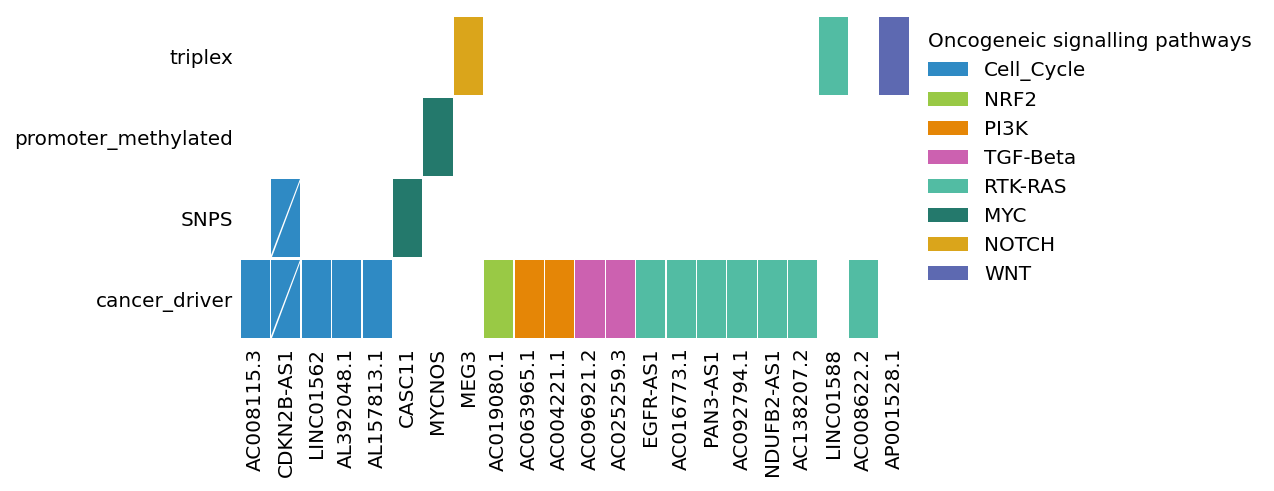

In [110]:
example_comut         = comut.CoMut()
example_comut.add_categorical_data(brca_de_path, name = 'Oncogeneic signalling pathways',)
figsize   = (6,3)
fig =example_comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, figsize = figsize)
example_comut.add_unified_legend()
#example_comut.figure.savefig('BRCA_pathways_only'+ extension, dpi = dpi)